#Clustering methods: classifying groups of people depending on their income and depenses using the Kmeans method

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [ ]:
df_cus = pd.read_csv('https://raw.githubusercontent.com/BriceNW/datasets_and_others/main/Mall_Customers.csv')
df_cus.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df_cus.info()

In [ ]:
df_cus.drop(['CustomerID'],axis=1, inplace=True)

In [ ]:
#Converting the genre information into numerical informations
df_cus2 = pd.get_dummies(df_cus, drop_first=True)

In [ ]:
df_cus2

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [ ]:
# Setting the scaler
scaler = StandardScaler().fit(df_cus2)
df_scaled = scaler.transform(df_cus2)

In [ ]:
#Standardizing the dataset
pd.DataFrame(df_scaled, columns=df_cus2.columns)

##Determiner la valeur de K (nombre de clusters)
- Elbow method

In [ ]:
from sklearn.cluster import KMeans

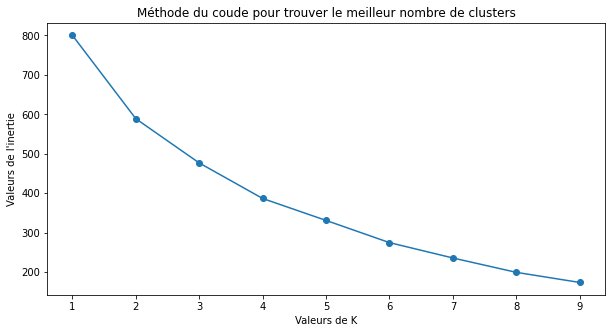

In [ ]:
# We want to determine the best value of K (number of clusters)
# We compute the inertia for 10 values of K
# This is the elbow method: we try to visualize the best value of K as the value at the "elbow"
# of the graph

valeurs_inertie =[]
for K in range(1,10):
  model = KMeans(n_clusters=K, random_state=15)
  model.fit(df_scaled)

  valeurs_inertie.append(model.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,10), valeurs_inertie, marker='o')
plt.title('Méthode du coude pour trouver le meilleur nombre de clusters')
plt.xlabel('Valeurs de K')
plt.ylabel("Valeurs de l'inertie")
plt.show()

- Silhouette method

In [ ]:
from sklearn.metrics import silhouette_score

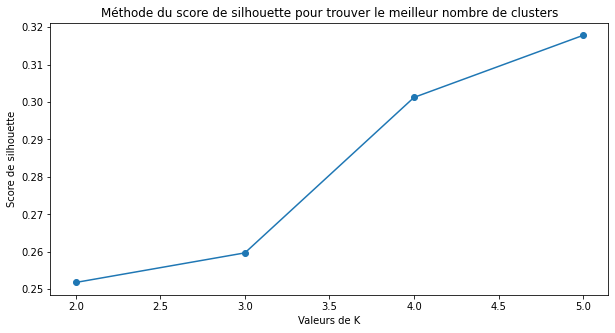

In [ ]:
# We compute the silhouette scores for various values of K
# We also take into account the previous results to reduce the search space

score = []

for K in range(2,6):
  model = KMeans(n_clusters=K, random_state=15)
  model.fit(df_scaled)
  cluster = model.predict(df_scaled)
  
  score.append(silhouette_score(df_scaled, cluster))

plt.figure(figsize=(10,5))
plt.plot(range(2,6,1), score, marker='o')
plt.title('Méthode du score de silhouette pour trouver le meilleur nombre de clusters')
plt.xlabel('Valeurs de K')
plt.ylabel("Score de silhouette")
plt.show()

#We use K=5 (best silhouette score)

In [ ]:
model_kmeans = KMeans(n_clusters=5, random_state=15)
model_kmeans.fit(df_cus2)
df_cus2['Clusters'] = model_kmeans.predict(df_cus2)

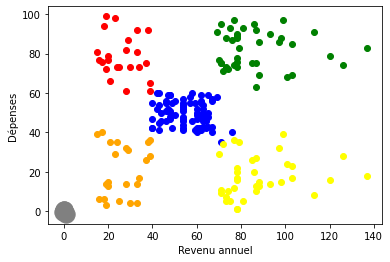

In [ ]:
plt.scatter(df_cus2['Annual Income (k$)'][df_cus2['Clusters']==0],df_cus2['Spending Score (1-100)'][df_cus2['Clusters']==0], c='red')
plt.scatter(df_cus2['Annual Income (k$)'][df_cus2['Clusters']==1],df_cus2['Spending Score (1-100)'][df_cus2['Clusters']==1], c='blue')
plt.scatter(df_cus2['Annual Income (k$)'][df_cus2['Clusters']==2],df_cus2['Spending Score (1-100)'][df_cus2['Clusters']==2], c='orange')
plt.scatter(df_cus2['Annual Income (k$)'][df_cus2['Clusters']==3],df_cus2['Spending Score (1-100)'][df_cus2['Clusters']==3], c='yellow')
plt.scatter(df_cus2['Annual Income (k$)'][df_cus2['Clusters']==4],df_cus2['Spending Score (1-100)'][df_cus2['Clusters']==4], c='green')
plt.scatter(model_kmeans.cluster_centers_[:, 1], model_kmeans.cluster_centers_[:, 2], c='grey', s=300)
plt.xlabel('Revenu annuel')
plt.ylabel('Dépenses')
plt.show()

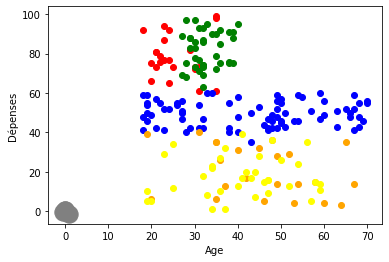

In [ ]:
plt.scatter(df_cus2['Age'][df_cus2['Clusters']==0],df_cus2['Spending Score (1-100)'][df_cus2['Clusters']==0], c='red')
plt.scatter(df_cus2['Age'][df_cus2['Clusters']==1],df_cus2['Spending Score (1-100)'][df_cus2['Clusters']==1], c='blue')
plt.scatter(df_cus2['Age'][df_cus2['Clusters']==2],df_cus2['Spending Score (1-100)'][df_cus2['Clusters']==2], c='orange')
plt.scatter(df_cus2['Age'][df_cus2['Clusters']==3],df_cus2['Spending Score (1-100)'][df_cus2['Clusters']==3], c='yellow')
plt.scatter(df_cus2['Age'][df_cus2['Clusters']==4],df_cus2['Spending Score (1-100)'][df_cus2['Clusters']==4], c='green')
plt.scatter(model_kmeans.cluster_centers_[:,1], model_kmeans.cluster_centers_[:,2], c='grey', s=300)
plt.xlabel('Age')
plt.ylabel('Dépenses')
plt.show()

#Applying PCA to the dataset to better represent clusters
- 1st case: keep 95% of variance

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# We only keep the variables that represent 95% of the total variance
X = df_cus2.drop('Clusters', axis=1)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

In [ ]:
pca.explained_variance_ratio_

- 2nd case: we chose the number of variables (3 variables)

In [ ]:
X = df_cus2.drop('Clusters', axis=1)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [ ]:
pca.explained_variance_ratio_

array([0.45118077, 0.44091539, 0.10774566])

With 3 variables, we keep 100% of variance (45% + 44% + 1%)
We don't need 4 variables

In [ ]:
pd.DataFrame(pca.components_, columns=X.columns, index=['Var1','Var2','Var3'])

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
Var1,-0.188977,0.588623,0.786009,-0.000333
Var2,0.130961,0.808388,-0.573895,0.001579
Var3,0.973208,0.005515,0.229856,0.001462


Analysis:

Var1 mainly contains information about depenses

Var2 mainly contains information about the annual income

Var3 mainly contains information about the age